# News Topic Classification with NLP

##  STEP 1: Dataset Loading & Initial Inspection

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("/kaggle/input/bbc-text.csv")
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [10]:
# Examining the dataset structure
print("\n" + "="*60)
print("DATASET STRUCTURE ANALYSIS")
print("="*60)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

print("\n" + "="*60)




DATASET STRUCTURE ANALYSIS
Dataset shape: (2225, 2)
Columns: ['category', 'text']

First 5 rows:
        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...



In [11]:

print("CATEGORY ANALYSIS")
print("="*60)
# Check and standardize the category column name
if 'category' in df.columns:
    print("Using 'category' column")
elif 'Category' in df.columns:
    df.rename(columns={'Category': 'category'}, inplace=True)
    print("Renamed 'Category' to 'category'")
elif 'labels' in df.columns:
    df.rename(columns={'labels': 'category'}, inplace=True)
    print("Renamed 'labels' to 'category'")
elif 'label' in df.columns:
    df.rename(columns={'label': 'category'}, inplace=True)
    print("Renamed 'label' to 'category'")

# Similarly for text column
if 'text' not in df.columns:
    if 'Text' in df.columns:
        df.rename(columns={'Text': 'text'}, inplace=True)
        print("Renamed 'Text' to 'text'")
    elif 'article' in df.columns:
        df.rename(columns={'article': 'text'}, inplace=True)
        print("Renamed 'article' to 'text'")
    elif 'description' in df.columns:
        df.rename(columns={'description': 'text'}, inplace=True)
        print("Renamed 'description' to 'text'")
    elif 'content' in df.columns:
        df.rename(columns={'content': 'text'}, inplace=True)
        print("Renamed 'content' to 'text'")

print(f"\nFinal columns: {df.columns.tolist()}")


CATEGORY ANALYSIS
Using 'category' column

Final columns: ['category', 'text']


In [12]:

#Analyzing the categories
print("\nCategory distribution:")
print(df['category'].value_counts())
print(f"\nNumber of unique categories: {df['category'].nunique()}")

print("\n" + "="*60)
print("DATA QUALITY CHECK")
print("="*60)
print(f"Missing values:\n{df.isnull().sum()}")
print(f"Duplicate texts: {df['text'].duplicated().sum()}")
print(f"Total duplicate rows: {df.duplicated().sum()}")



Category distribution:
category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

Number of unique categories: 5

DATA QUALITY CHECK
Missing values:
category    0
text        0
dtype: int64
Duplicate texts: 99
Total duplicate rows: 99


In [13]:

# Sample some data from each category
print("\n" + "="*60)
print("SAMPLE FROM EACH CATEGORY")
print("="*60)
for category in df['category'].unique():
    sample_text = df[df['category'] == category]['text'].iloc[0][:200] + "..."
    print(f"\n{category.upper()}:")
    print(f"Sample: {sample_text}")
    print(f"Count: {len(df[df['category'] == category])}")




SAMPLE FROM EACH CATEGORY

TECH:
Sample: tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in...
Count: 401

BUSINESS:
Sample: worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made...
Count: 510

SPORT:
Sample: tigers wary of farrell  gamble  leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes.   we and anybody else inv...
Count: 511

ENTERTAINMENT:
Sample: ocean s twelve raids box office ocean s twelve  the crime caper sequel starring george clooney  brad pitt and julia roberts  has gone straight to number one in the us box office chart.  it took $40.8m...
Count: 386

POLITICS:
Sample: howard hits back at 

## STEP 2: Exploratory Data Analysis (EDA)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")



=== COMPREHENSIVE EXPLORATORY DATA ANALYSIS ===


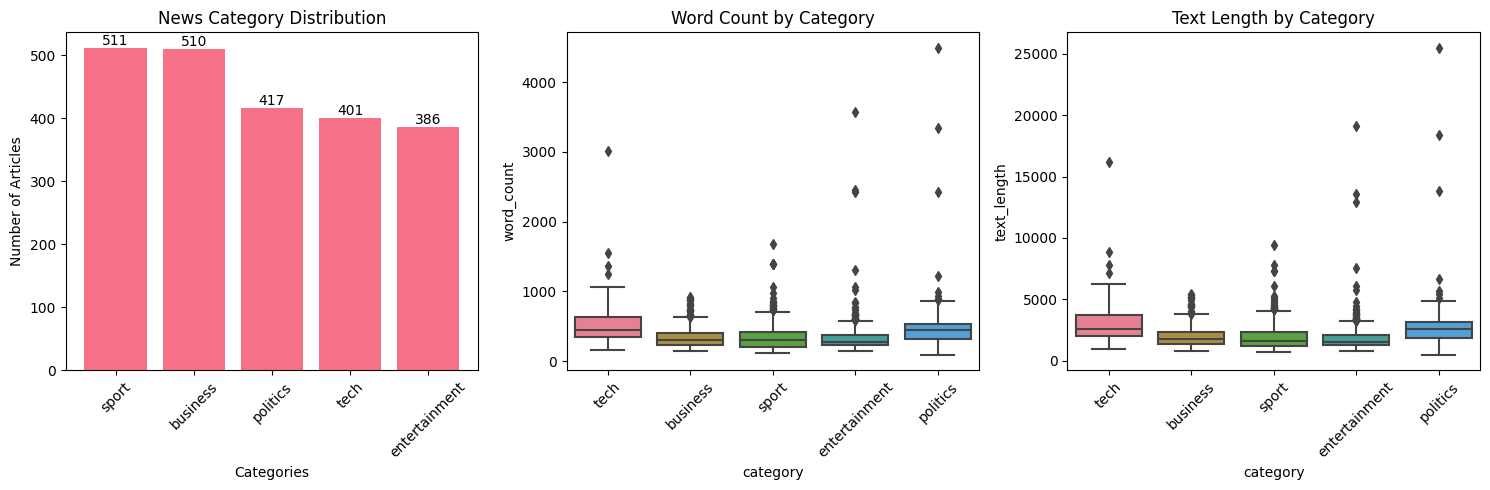

In [15]:


print("=== COMPREHENSIVE EXPLORATORY DATA ANALYSIS ===")

# 1. Category Distribution Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
category_counts = df['category'].value_counts()
bars = plt.bar(category_counts.index, category_counts.values)
plt.title('News Category Distribution')
plt.xlabel('Categories')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')


# 2. Text Length Analysis
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Word Count by Category')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='category', y='text_length')
plt.title('Text Length by Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [16]:

# 3. Text Length Statistics
print("\n=== TEXT LENGTH STATISTICS ===")
print(df.groupby('category')['word_count'].describe())


=== TEXT LENGTH STATISTICS ===
               count        mean         std    min     25%    50%     75%  \
category                                                                     
business       510.0  334.186275  138.009377  142.0  236.00  303.0  395.75   
entertainment  386.0  337.676166  268.532851  144.0  228.25  267.0  367.75   
politics       417.0  461.194245  304.527074   90.0  320.00  449.0  536.00   
sport          511.0  336.322896  191.445419  116.0  208.00  296.0  415.50   
tech           401.0  507.356608  242.378774  165.0  340.00  450.0  633.00   

                  max  
category               
business        912.0  
entertainment  3570.0  
politics       4492.0  
sport          1671.0  
tech           3007.0  


In [17]:


# 4. Remove duplicates (important for model training)
print(f"\n=== DATA CLEANING ===")
print(f"Before removing duplicates: {df.shape[0]} articles")
df_clean = df.drop_duplicates(subset=['text'])
print(f"After removing duplicates: {df_clean.shape[0]} articles")


=== DATA CLEANING ===
Before removing duplicates: 2225 articles
After removing duplicates: 2126 articles



=== GENERATING WORD CLOUDS ===


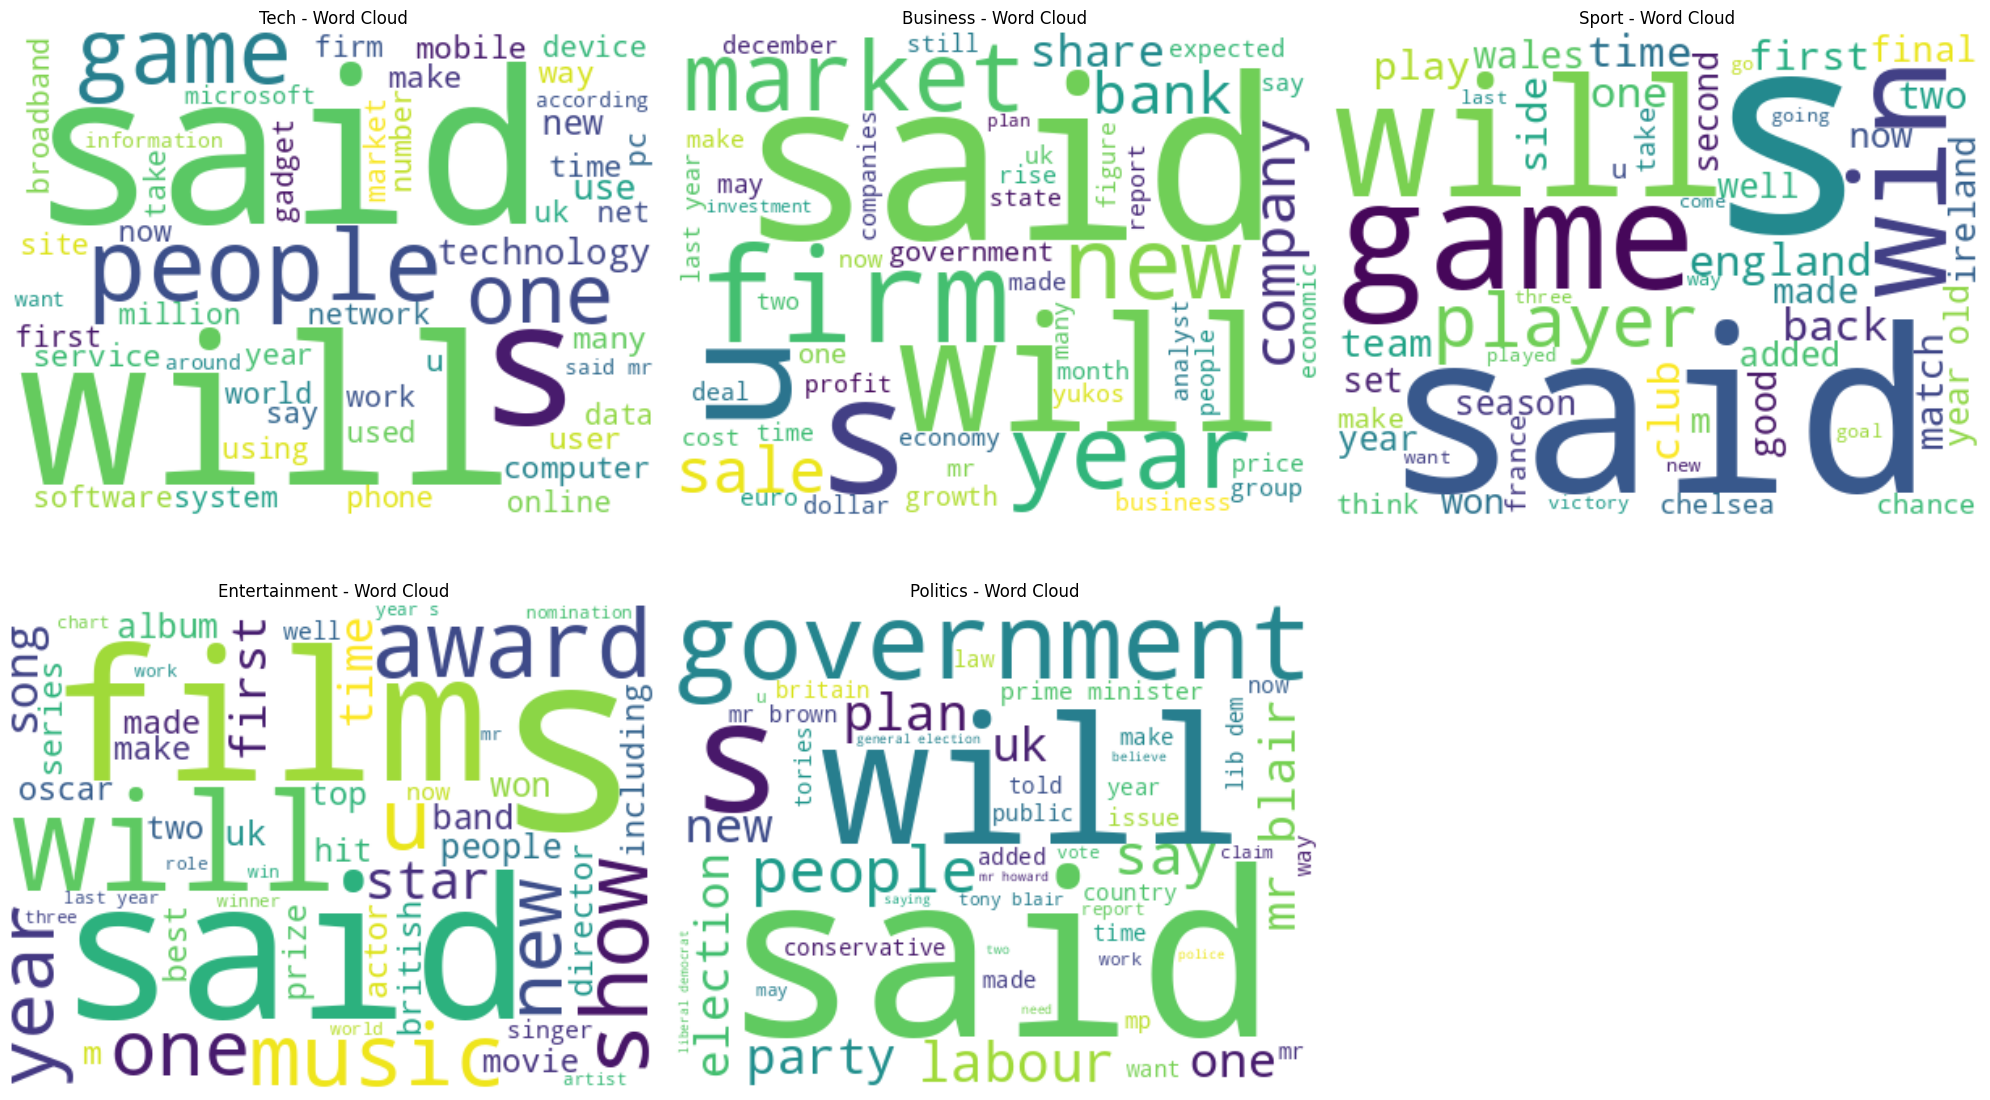

In [18]:

# 5. Word Cloud for each category
print("\n=== GENERATING WORD CLOUDS ===")
plt.figure(figsize=(20, 12))

for i, category in enumerate(df_clean['category'].unique(), 1):
    plt.subplot(2, 3, i)
    text = ' '.join(df_clean[df_clean['category'] == category]['text'])
    wordcloud = WordCloud(width=400, height=300, 
                         background_color='white',
                         max_words=50).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{category.title()} - Word Cloud')
    plt.axis('off')

plt.tight_layout()
plt.show()





=== TOP WORDS BY CATEGORY ===


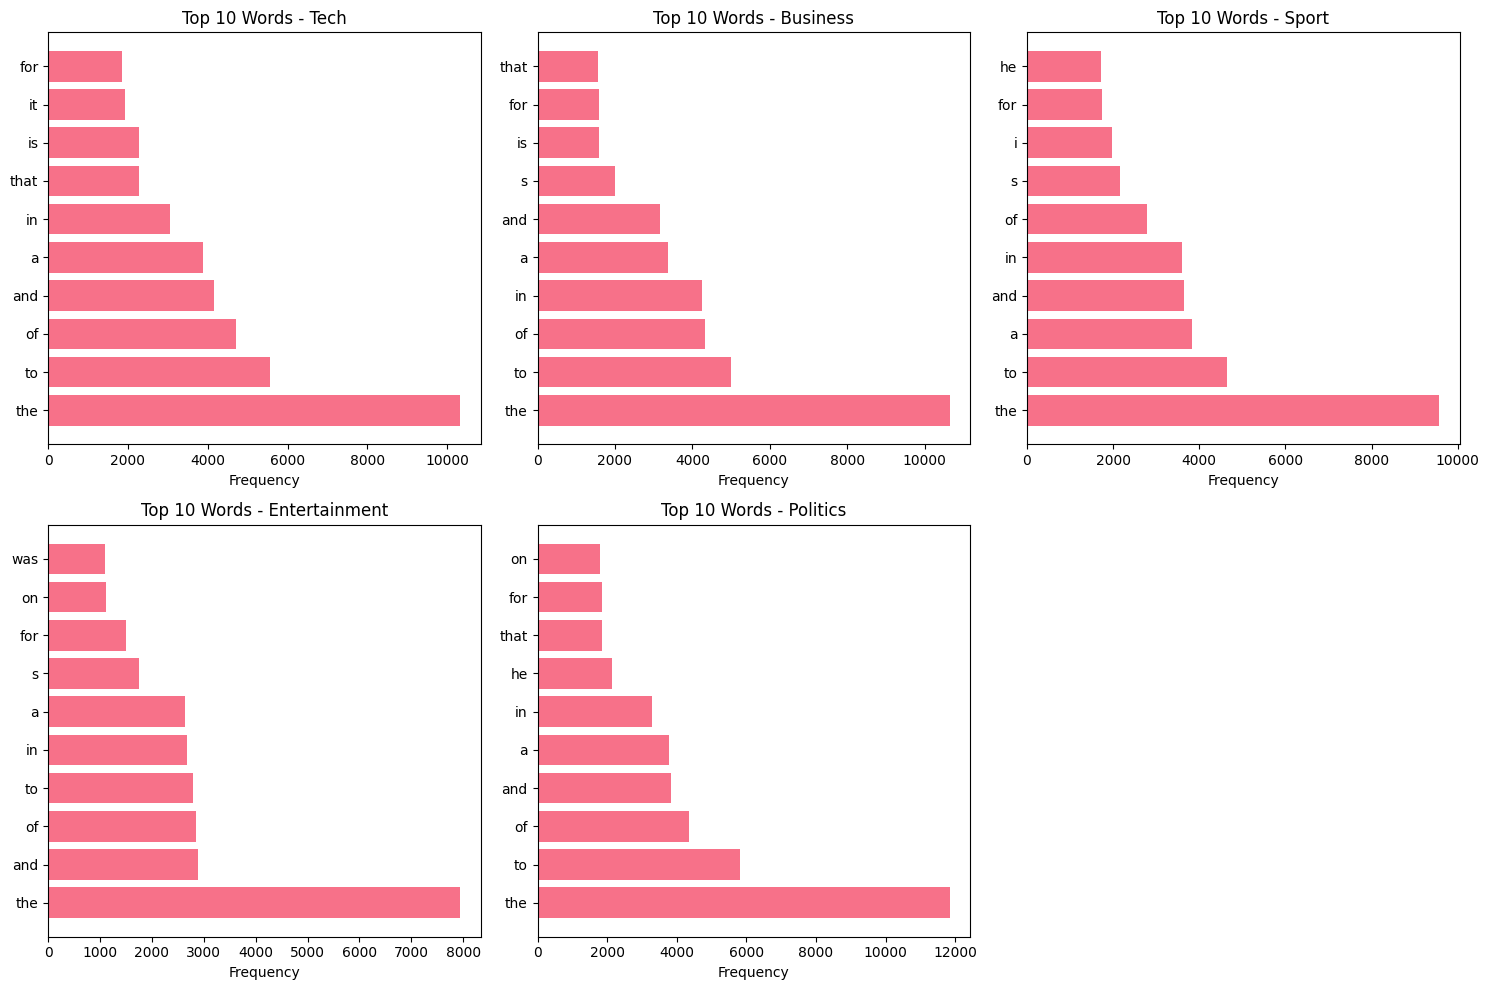

In [19]:
# 6. Most Common Words by Category
print("\n=== TOP WORDS BY CATEGORY ===")
def get_top_words(text_series, n=10):
    all_words = ' '.join(text_series).split()
    return Counter(all_words).most_common(n)

plt.figure(figsize=(15, 10))
for i, category in enumerate(df_clean['category'].unique(), 1):
    plt.subplot(2, 3, i)
    category_texts = df_clean[df_clean['category'] == category]['text']
    top_words = get_top_words(category_texts, 10)
    
    words, counts = zip(*top_words)
    plt.barh(words, counts)
    plt.title(f'Top 10 Words - {category.title()}')
    plt.xlabel('Frequency')

plt.tight_layout()
plt.show()


## STEP 3: Text Preprocessing & Feature Engineering

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


=== TEXT PREPROCESSING PIPELINE ===
Applying text preprocessing...

=== TEXT PREPROCESSING COMPARISON ===
ORIGINAL TEXT:
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer elect...

PROCESSED TEXT:
future hand viewer home theatre system plasma high definition tv digital video recorder moving living room watch radically different five according expert panel gathered annual consumer electronics show la vega discus technology impact favourite pastime leading trend programme content delivered view...

=== PROCESSED TEXT STATISTICS ===
Word count reduction after preprocessing:
Average words per article:
  Before: 390.5
  After:  198.6
  Reduction: 49.1%


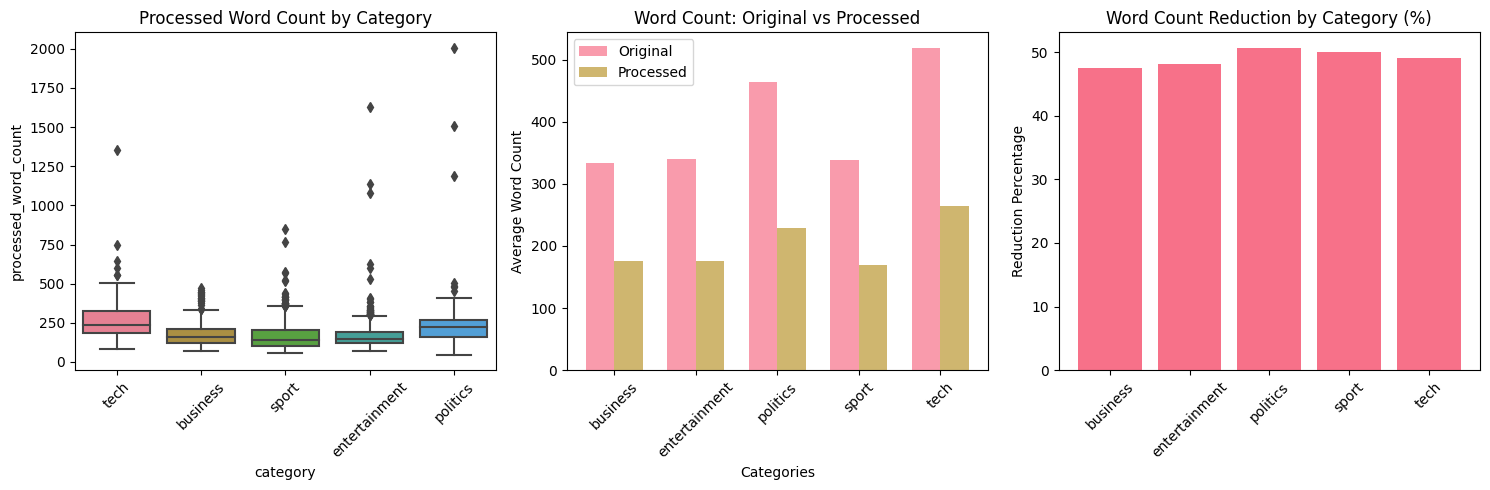

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import re

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

print("=== TEXT PREPROCESSING PIPELINE ===")

# Initialize NLP tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Extended stopwords list
extended_stopwords = stop_words.union({
    'said', 'would', 'could', 'also', 'one', 'two', 'new', 'year', 'years',
    'time', 'people', 'like', 'us', 'make', 'way', 'first', 'last'
})

def preprocess_text(text, use_lemmatization=True):
    """
    Comprehensive text preprocessing function
    """
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove numbers and special characters
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # 3. Tokenization
    tokens = nltk.word_tokenize(text)
    
    # 4. Remove stopwords and short words
    tokens = [word for word in tokens if word not in extended_stopwords and len(word) > 2]
    
    # 5. Stemming or Lemmatization
    if use_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    else:
        tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing
print("Applying text preprocessing...")
df_clean['processed_text'] = df_clean['text'].apply(lambda x: preprocess_text(x))

# Show before/after comparison
print("\n=== TEXT PREPROCESSING COMPARISON ===")
sample_idx = 0
print("ORIGINAL TEXT:")
print(df_clean['text'].iloc[sample_idx][:300] + "...")
print("\nPROCESSED TEXT:")
print(df_clean['processed_text'].iloc[sample_idx][:300] + "...")

# Check processed text statistics
df_clean['processed_word_count'] = df_clean['processed_text'].apply(lambda x: len(x.split()))

print("\n=== PROCESSED TEXT STATISTICS ===")
print("Word count reduction after preprocessing:")
original_avg = df_clean['word_count'].mean()
processed_avg = df_clean['processed_word_count'].mean()
reduction = ((original_avg - processed_avg) / original_avg) * 100
print(f"Average words per article:")
print(f"  Before: {original_avg:.1f}")
print(f"  After:  {processed_avg:.1f}")
print(f"  Reduction: {reduction:.1f}%")

# Visualize the impact
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_clean, x='category', y='processed_word_count')
plt.title('Processed Word Count by Category')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
category_avg = df_clean.groupby('category')['word_count'].mean()
processed_avg = df_clean.groupby('category')['processed_word_count'].mean()

x = np.arange(len(category_avg))
width = 0.35

plt.bar(x - width/2, category_avg, width, label='Original', alpha=0.7)
plt.bar(x + width/2, processed_avg, width, label='Processed', alpha=0.7)
plt.xlabel('Categories')
plt.ylabel('Average Word Count')
plt.title('Word Count: Original vs Processed')
plt.xticks(x, category_avg.index, rotation=45)
plt.legend()

plt.subplot(1, 3, 3)
reduction_by_category = ((category_avg - processed_avg) / category_avg) * 100
plt.bar(reduction_by_category.index, reduction_by_category.values)
plt.title('Word Count Reduction by Category (%)')
plt.xticks(rotation=45)
plt.ylabel('Reduction Percentage')

plt.tight_layout()
plt.show()




=== TOP WORDS AFTER PREPROCESSING ===


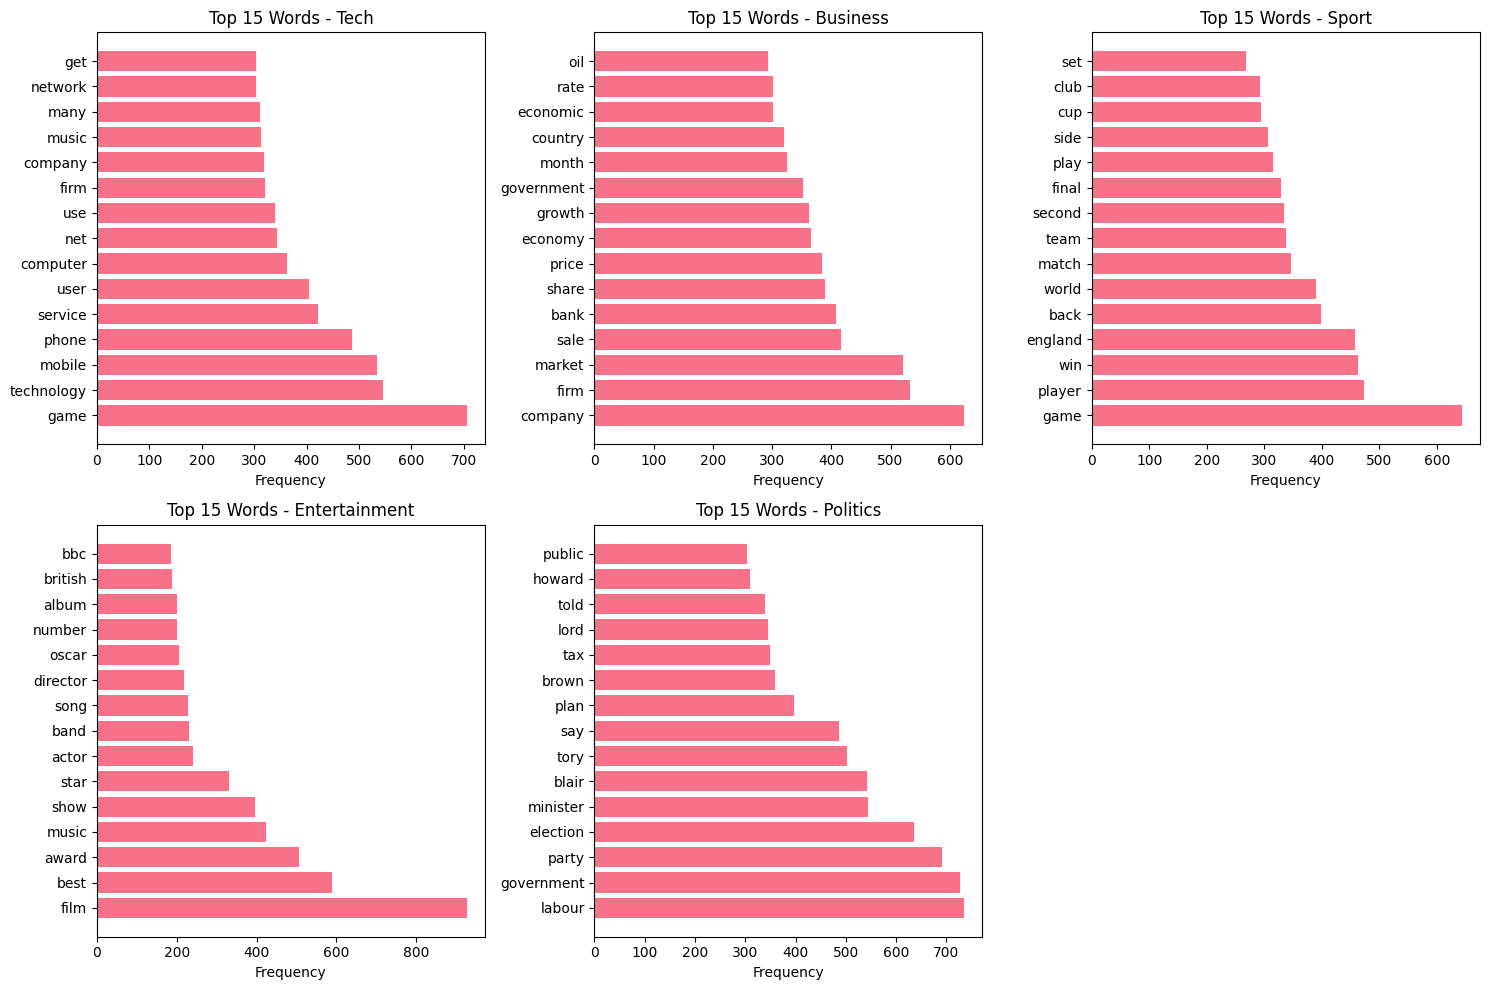

In [21]:
# Check top words after preprocessing
print("\n=== TOP WORDS AFTER PREPROCESSING ===")
def get_top_processed_words(text_series, n=15):
    all_words = ' '.join(text_series).split()
    return Counter(all_words).most_common(n)

plt.figure(figsize=(15, 10))
for i, category in enumerate(df_clean['category'].unique(), 1):
    plt.subplot(2, 3, i)
    category_texts = df_clean[df_clean['category'] == category]['processed_text']
    top_words = get_top_processed_words(category_texts, 15)
    
    words, counts = zip(*top_words)
    plt.barh(words, counts)
    plt.title(f'Top 15 Words - {category.title()}')
    plt.xlabel('Frequency')

plt.tight_layout()
plt.show()


In [22]:
# 7. Display actual top words
print("\n=== TOP 10 WORDS PER CATEGORY ===")
for category in df_clean['category'].unique():
    category_texts = df_clean[df_clean['category'] == category]['text']
    top_words = get_top_words(category_texts, 10)
    print(f"\n{category.upper()}:")
    for word, count in top_words:
        print(f"  {word}: {count}")




=== TOP 10 WORDS PER CATEGORY ===

TECH:
  the: 10324
  to: 5567
  of: 4712
  and: 4167
  a: 3888
  in: 3057
  that: 2271
  is: 2271
  it: 1919
  for: 1848

BUSINESS:
  the: 10644
  to: 4996
  of: 4315
  in: 4242
  a: 3364
  and: 3152
  s: 1993
  is: 1581
  for: 1576
  that: 1563

SPORT:
  the: 9569
  to: 4654
  a: 3823
  and: 3646
  in: 3589
  of: 2776
  s: 2167
  i: 1974
  for: 1734
  he: 1715

ENTERTAINMENT:
  the: 7942
  and: 2895
  of: 2858
  to: 2787
  in: 2671
  a: 2643
  s: 1749
  for: 1492
  on: 1124
  was: 1101

POLITICS:
  the: 11838
  to: 5810
  of: 4337
  and: 3843
  a: 3771
  in: 3291
  he: 2129
  that: 1863
  for: 1856
  on: 1798


In [23]:
print("\n" + "="*60)
print("PREPROCESSING COMPLETE - READY FOR FEATURE ENGINEERING")
print("="*60)


PREPROCESSING COMPLETE - READY FOR FEATURE ENGINEERING


In [24]:
# 8. Final Dataset Summary
print("\n" + "="*60)
print("FINAL DATASET SUMMARY")
print("="*60)
print(f"Total articles: {df_clean.shape[0]}")
print(f"Categories: {df_clean['category'].nunique()}")
print(f"Average words per article: {df_clean['word_count'].mean():.0f}")
print(f"Average characters per article: {df_clean['text_length'].mean():.0f}")
print(f"Category balance:")
for category in df_clean['category'].unique():
    count = len(df_clean[df_clean['category'] == category])
    percentage = (count / len(df_clean)) * 100
    print(f"  - {category}: {count} articles ({percentage:.1f}%)")


FINAL DATASET SUMMARY
Total articles: 2126
Categories: 5
Average words per article: 390
Average characters per article: 2263
Category balance:
  - tech: 347 articles (16.3%)
  - business: 503 articles (23.7%)
  - sport: 504 articles (23.7%)
  - entertainment: 369 articles (17.4%)
  - politics: 403 articles (19.0%)


## STEP 4: Feature Engineering with TF-IDF

In [25]:


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

print("=== FEATURE ENGINEERING WITH TF-IDF - FIXED ===")

# Encode the target variable
label_encoder = LabelEncoder()
df_clean['category_encoded'] = label_encoder.fit_transform(df_clean['category'])

print("Category encoding mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"  {category} -> {i}")

# Prepare features and target
X = df_clean['processed_text']
y = df_clean['category_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n=== DATA SPLIT ===")
print(f"Training set: {X_train.shape[0]} articles")
print(f"Test set: {X_test.shape[0]} articles")
print(f"Training distribution: {np.unique(y_train, return_counts=True)}")
print(f"Test distribution: {np.unique(y_test, return_counts=True)}")

=== FEATURE ENGINEERING WITH TF-IDF - FIXED ===
Category encoding mapping:
  business -> 0
  entertainment -> 1
  politics -> 2
  sport -> 3
  tech -> 4

=== DATA SPLIT ===
Training set: 1700 articles
Test set: 426 articles
Training distribution: (array([0, 1, 2, 3, 4]), array([402, 295, 322, 403, 278]))
Test distribution: (array([0, 1, 2, 3, 4]), array([101,  74,  81, 101,  69]))


In [26]:

# Initialize TF-IDF Vectorizer with different parameter sets
tfidf_configs = {
    'basic': {
        'vectorizer': TfidfVectorizer(max_features=5000, stop_words='english'),
        'description': 'Basic TF-IDF (5000 features)'
    },
    'ngram': {
        'vectorizer': TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english'),
        'description': 'TF-IDF with Uni+Bigrams'
    },
    'optimized': {
        'vectorizer': TfidfVectorizer(max_features=3000, ngram_range=(1, 2), 
                                     min_df=2, max_df=0.8, stop_words='english'),
        'description': 'Optimized TF-IDF (min_df=2, max_df=0.8)'
    }
}

# Transform the data with different TF-IDF configurations
feature_sets = {}

for config_name, config in tfidf_configs.items():
    print(f"\n--- {config['description']} ---")
    vectorizer = config['vectorizer']
    
    # Fit and transform
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    
    feature_sets[config_name] = {
        'X_train': X_train_tfidf,
        'X_test': X_test_tfidf,
        'vectorizer': vectorizer,
        'y_train': y_train.values,  # Convert to numpy array for proper indexing
        'y_test': y_test.values
    }
    
    print(f"Feature matrix shape: {X_train_tfidf.shape}")
    print(f"Vocabulary size: {len(vectorizer.get_feature_names_out())}")
    
    # Show some feature names
    feature_names = vectorizer.get_feature_names_out()
    print(f"Sample features: {feature_names[:20]}")

# Compare feature matrices
print("\n" + "="*60)
print("FEATURE ENGINEERING SUMMARY")
print("="*60)

for config_name in tfidf_configs.keys():
    shape = feature_sets[config_name]['X_train'].shape
    print(f"{config_name.upper()}: {shape[0]} samples × {shape[1]} features")


--- Basic TF-IDF (5000 features) ---
Feature matrix shape: (1700, 5000)
Vocabulary size: 5000
Sample features: ['aaa' 'abandoned' 'abba' 'abbas' 'abc' 'ability' 'able' 'abn' 'abortion'
 'abroad' 'absence' 'absolute' 'absolutely' 'abuse' 'abused' 'academy'
 'accept' 'acceptable' 'acceptance' 'accepted']

--- TF-IDF with Uni+Bigrams ---
Feature matrix shape: (1700, 5000)
Vocabulary size: 5000
Sample features: ['aaa' 'abc' 'ability' 'able' 'abortion' 'abroad' 'absence' 'absolute'
 'absolutely' 'abuse' 'abused' 'academy' 'academy award' 'accept'
 'accepted' 'access' 'accessible' 'accident' 'according'
 'according figure']

--- Optimized TF-IDF (min_df=2, max_df=0.8) ---
Feature matrix shape: (1700, 3000)
Vocabulary size: 3000
Sample features: ['ability' 'able' 'abroad' 'absence' 'absolutely' 'abuse' 'academy'
 'academy award' 'accept' 'accepted' 'access' 'accident' 'according'
 'according report' 'account' 'accounting' 'accused' 'achieve' 'achieved'
 'achievement']

FEATURE ENGINEERING SU


=== TOP TF-IDF FEATURES BY CATEGORY ===


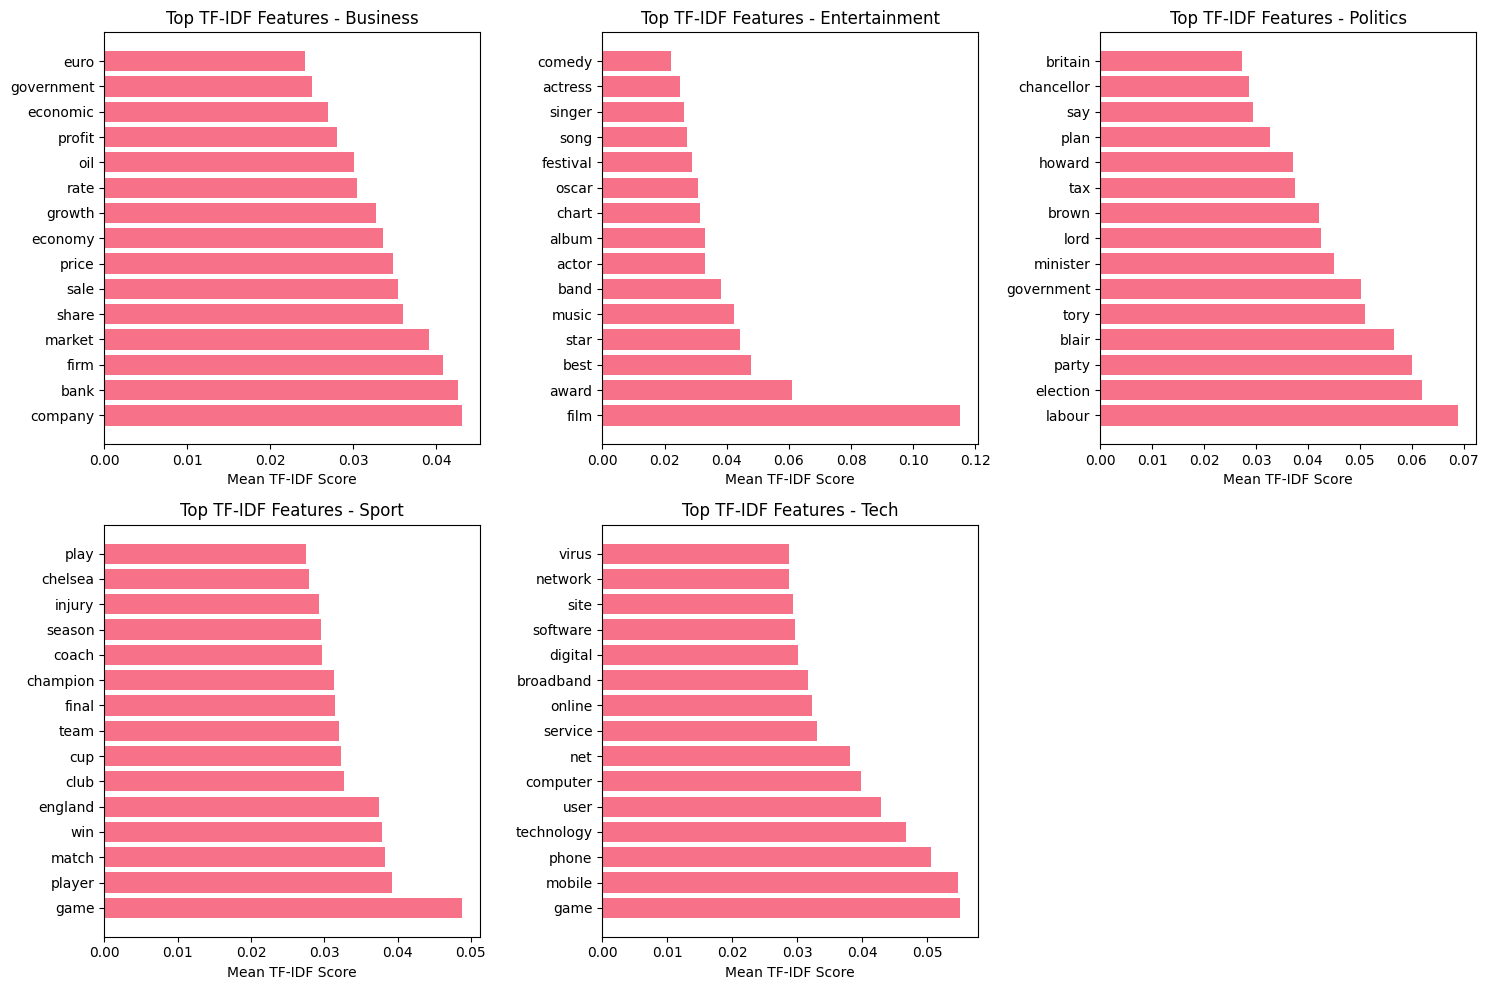

In [27]:

# Analyze most important features by category - FIXED VERSION
print("\n=== TOP TF-IDF FEATURES BY CATEGORY ===")
best_config = 'optimized'
vectorizer = feature_sets[best_config]['vectorizer']
X_train_tfidf = feature_sets[best_config]['X_train']
y_train_array = feature_sets[best_config]['y_train']  # Use numpy array

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Calculate mean TF-IDF scores for each category
mean_tfidf_by_category = []
for category_idx, category_name in enumerate(label_encoder.classes_):
    # Get indices for this category - FIXED: use numpy array for boolean indexing
    category_mask = (y_train_array == category_idx)
    category_tfidf = X_train_tfidf[category_mask]
    
    # Calculate mean TF-IDF scores
    mean_scores = np.asarray(category_tfidf.mean(axis=0)).flatten()
    
    # Get top 10 features
    top_indices = mean_scores.argsort()[-15:][::-1]  # Get top 15
    top_features = [(feature_names[i], mean_scores[i]) for i in top_indices]
    
    mean_tfidf_by_category.append((category_name, top_features))

# Display top features
plt.figure(figsize=(15, 10))
for i, (category_name, top_features) in enumerate(mean_tfidf_by_category, 1):
    plt.subplot(2, 3, i)
    words, scores = zip(*top_features)
    plt.barh(words, scores)
    plt.title(f'Top TF-IDF Features - {category_name.title()}')
    plt.xlabel('Mean TF-IDF Score')

plt.tight_layout()
plt.show()



In [28]:
# Print top features
print("\nTop TF-IDF features by category:")
for category_name, top_features in mean_tfidf_by_category:
    print(f"\n{category_name.upper()}:")
    for word, score in top_features:
        print(f"  {word}: {score:.4f}")

# Let's also check the overall most important features
print("\n=== OVERALL TOP TF-IDF FEATURES ===")
overall_mean_scores = np.asarray(X_train_tfidf.mean(axis=0)).flatten()
top_overall_indices = overall_mean_scores.argsort()[-20:][::-1]
top_overall_features = [(feature_names[i], overall_mean_scores[i]) for i in top_overall_indices]

print("Top 20 overall TF-IDF features:")
for word, score in top_overall_features:
    print(f"  {word}: {score:.4f}")

print("\n" + "="*60)
print("FEATURE ENGINEERING COMPLETE - READY FOR MODEL TRAINING!")
print("="*60)
print("Summary of prepared feature sets:")
for config_name in tfidf_configs.keys():
    train_shape = feature_sets[config_name]['X_train'].shape
    test_shape = feature_sets[config_name]['X_test'].shape
    print(f"  {config_name}: {train_shape[0]} train, {test_shape[0]} test, {train_shape[1]} features")

print("\nNext: We'll train and compare multiple classification models!")


Top TF-IDF features by category:

BUSINESS:
  company: 0.0432
  bank: 0.0427
  firm: 0.0408
  market: 0.0392
  share: 0.0360
  sale: 0.0354
  price: 0.0348
  economy: 0.0336
  growth: 0.0328
  rate: 0.0304
  oil: 0.0301
  profit: 0.0281
  economic: 0.0270
  government: 0.0251
  euro: 0.0242

ENTERTAINMENT:
  film: 0.1151
  award: 0.0610
  best: 0.0478
  star: 0.0443
  music: 0.0425
  band: 0.0381
  actor: 0.0330
  album: 0.0329
  chart: 0.0315
  oscar: 0.0309
  festival: 0.0290
  song: 0.0272
  singer: 0.0264
  actress: 0.0249
  comedy: 0.0222

POLITICS:
  labour: 0.0690
  election: 0.0620
  party: 0.0600
  blair: 0.0565
  tory: 0.0510
  government: 0.0503
  minister: 0.0449
  lord: 0.0425
  brown: 0.0421
  tax: 0.0375
  howard: 0.0370
  plan: 0.0327
  say: 0.0294
  chancellor: 0.0286
  britain: 0.0274

SPORT:
  game: 0.0488
  player: 0.0392
  match: 0.0383
  win: 0.0379
  england: 0.0374
  club: 0.0327
  cup: 0.0322
  team: 0.0320
  final: 0.0314
  champion: 0.0313
  coach: 0.0297
  

##  STEP 5: Model Training & Evaluation

=== MODEL TRAINING & EVALUATION ===

--- Training Naive Bayes ---
Accuracy: 0.9695
Training time: 0.02 seconds

--- Training Logistic Regression ---
Accuracy: 0.9742
Training time: 0.56 seconds

--- Training SVM ---
Accuracy: 0.9718
Training time: 6.59 seconds

--- Training Random Forest ---
Accuracy: 0.9554
Training time: 1.32 seconds

MODEL PERFORMANCE COMPARISON
                 Model  Accuracy  Training Time (s)
1  Logistic Regression  0.974178           0.559645
2                  SVM  0.971831           6.594310
0          Naive Bayes  0.969484           0.016249
3        Random Forest  0.955399           1.316121


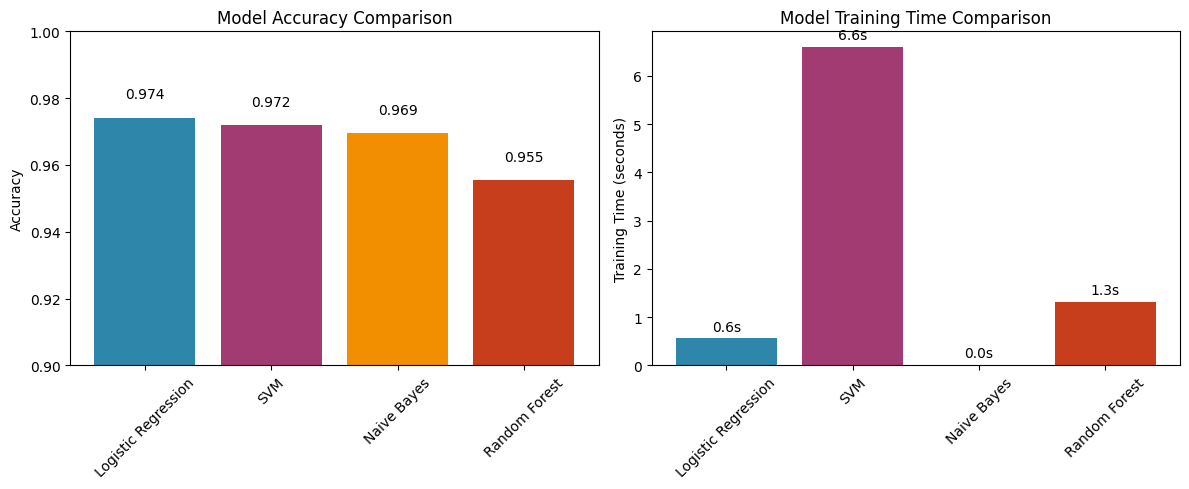


DETAILED EVALUATION: Logistic Regression

Classification Report:
               precision    recall  f1-score   support

     business       0.93      0.99      0.96       101
entertainment       1.00      0.96      0.98        74
     politics       1.00      0.98      0.99        81
        sport       0.97      1.00      0.99       101
         tech       0.98      0.93      0.96        69

     accuracy                           0.97       426
    macro avg       0.98      0.97      0.97       426
 weighted avg       0.98      0.97      0.97       426



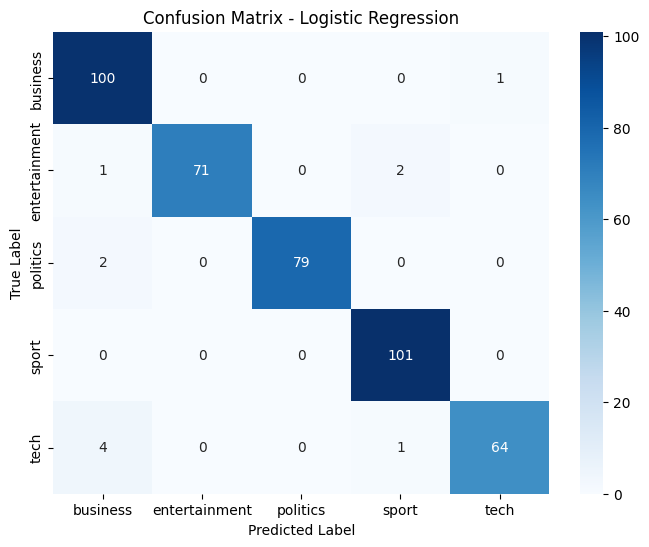


=== CROSS-VALIDATION RESULTS ===
Cross-validation scores: [0.95294118 0.95882353 0.98235294 0.96470588 0.97941176]
Mean CV accuracy: 0.9676 (+/- 0.0229)

FEATURE SET COMPARISON (Using Logistic Regression)
Basic TF-IDF (5000 features): 0.9742
TF-IDF with Uni+Bigrams: 0.9718
Optimized TF-IDF (min_df=2, max_df=0.8): 0.9742


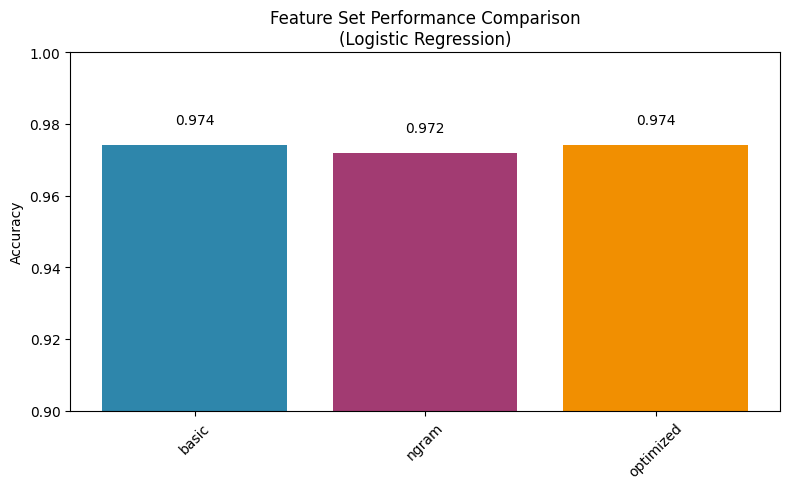


MODEL TRAINING COMPLETE!
Best Model: Logistic Regression
Best Accuracy: 0.9742

Next: We'll perform hyperparameter tuning on the best model!


In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import time

print("=== MODEL TRAINING & EVALUATION ===")

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# We'll use the optimized TF-IDF features for model comparison
X_train = feature_sets['optimized']['X_train']
X_test = feature_sets['optimized']['X_test']
y_train = feature_sets['optimized']['y_train']
y_test = feature_sets['optimized']['y_test']

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    print(f"\n--- Training {model_name} ---")
    start_time = time.time()
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    training_time = time.time() - start_time
    
    # Store results
    results[model_name] = {
        'model': model,
        'y_pred': y_pred,
        'accuracy': accuracy,
        'training_time': training_time
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {training_time:.2f} seconds")

# Compare model performance
print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'Training Time (s)': [results[model]['training_time'] for model in results.keys()]
}).sort_values('Accuracy', ascending=False)

print(comparison_df)

# Visualize model comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
models_sorted = comparison_df['Model'].values
accuracies_sorted = comparison_df['Accuracy'].values
bars = plt.bar(models_sorted, accuracies_sorted, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
training_times = comparison_df['Training Time (s)'].values
bars = plt.bar(models_sorted, training_times, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])
plt.title('Model Training Time Comparison')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}s', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Detailed evaluation of the best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_y_pred = results[best_model_name]['y_pred']

print(f"\n" + "="*60)
print(f"DETAILED EVALUATION: {best_model_name}")
print("="*60)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, best_y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Cross-validation for more robust evaluation
print("\n=== CROSS-VALIDATION RESULTS ===")
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Compare performance across different feature sets
print("\n" + "="*60)
print("FEATURE SET COMPARISON (Using Logistic Regression)")
print("="*60)

feature_set_results = {}
for config_name in tfidf_configs.keys():
    X_train_fs = feature_sets[config_name]['X_train']
    X_test_fs = feature_sets[config_name]['X_test']
    
    # Train Logistic Regression (typically good for text)
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X_train_fs, y_train)
    y_pred_fs = lr_model.predict(X_test_fs)
    accuracy_fs = accuracy_score(y_test, y_pred_fs)
    
    feature_set_results[config_name] = accuracy_fs
    print(f"{tfidf_configs[config_name]['description']}: {accuracy_fs:.4f}")

# Visualize feature set comparison
plt.figure(figsize=(8, 5))
config_names = list(feature_set_results.keys())
accuracies_fs = list(feature_set_results.values())

bars = plt.bar(config_names, accuracies_fs, color=['#2E86AB', '#A23B72', '#F18F01'])
plt.title('Feature Set Performance Comparison\n(Logistic Regression)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MODEL TRAINING COMPLETE!")
print("="*60)
print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")
print("\nNext: We'll perform hyperparameter tuning on the best model!")

## STEP 6: Hyperparameter Tuning & Model Optimization

=== HYPERPARAMETER TUNING & MODEL OPTIMIZATION ===
--- Grid Search for Logistic Regression ---
Performing randomized search...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Tuning completed in 57.65 seconds
Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 2000, 'C': 100}
Best cross-validation score: 0.9671

Tuned model accuracy: 0.9718
Improvement over baseline: -0.0024


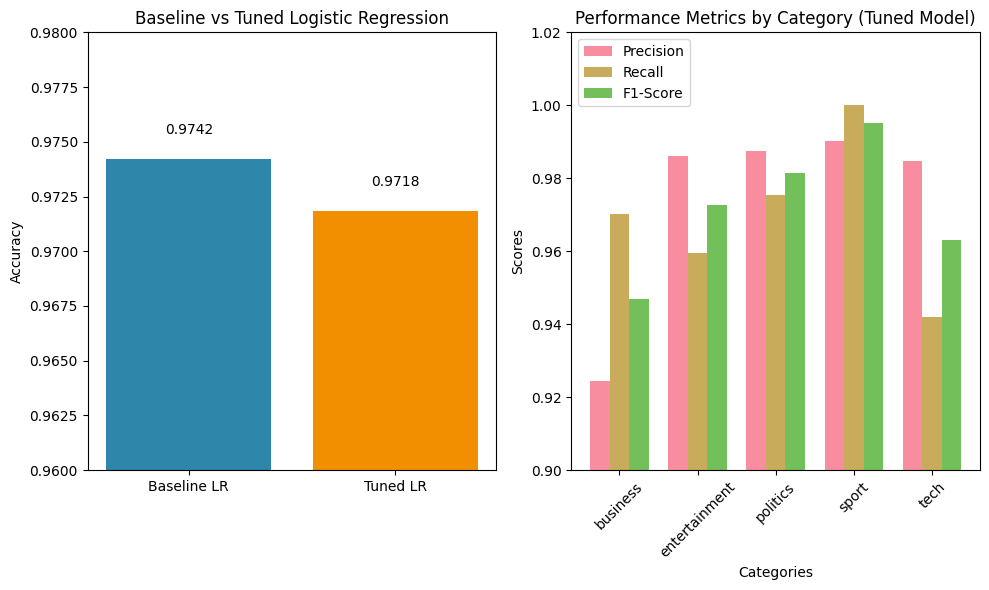


ERROR ANALYSIS - MISCLASSIFIED EXAMPLES
Number of misclassified articles: 12

Misclassified Example 1:
True: business -> Predicted: tech
Text preview: rovers reject third ferguson bid blackburn have rejected a third bid from rangers for scotland captain barry ferguson  bbc sport has learnt.  it is th...

Misclassified Example 2:
True: business -> Predicted: entertainment
Text preview: uk firms  embracing e-commerce  uk firms are embracing internet trading opportunities as never before  e-commerce minister mike o brien says.  a gover...

Misclassified Example 3:
True: tech -> Predicted: business
Text preview: musical treatment for capra film the classic film it s a wonderful life is to be turned into a musical by the producer of the controversial hit show j...

Misclassified Example 4:
True: entertainment -> Predicted: business
Text preview: chepkemei joins edinburgh line-up susan chepkemei has decided she is fit enough to run in next month s great edinburgh international cross country

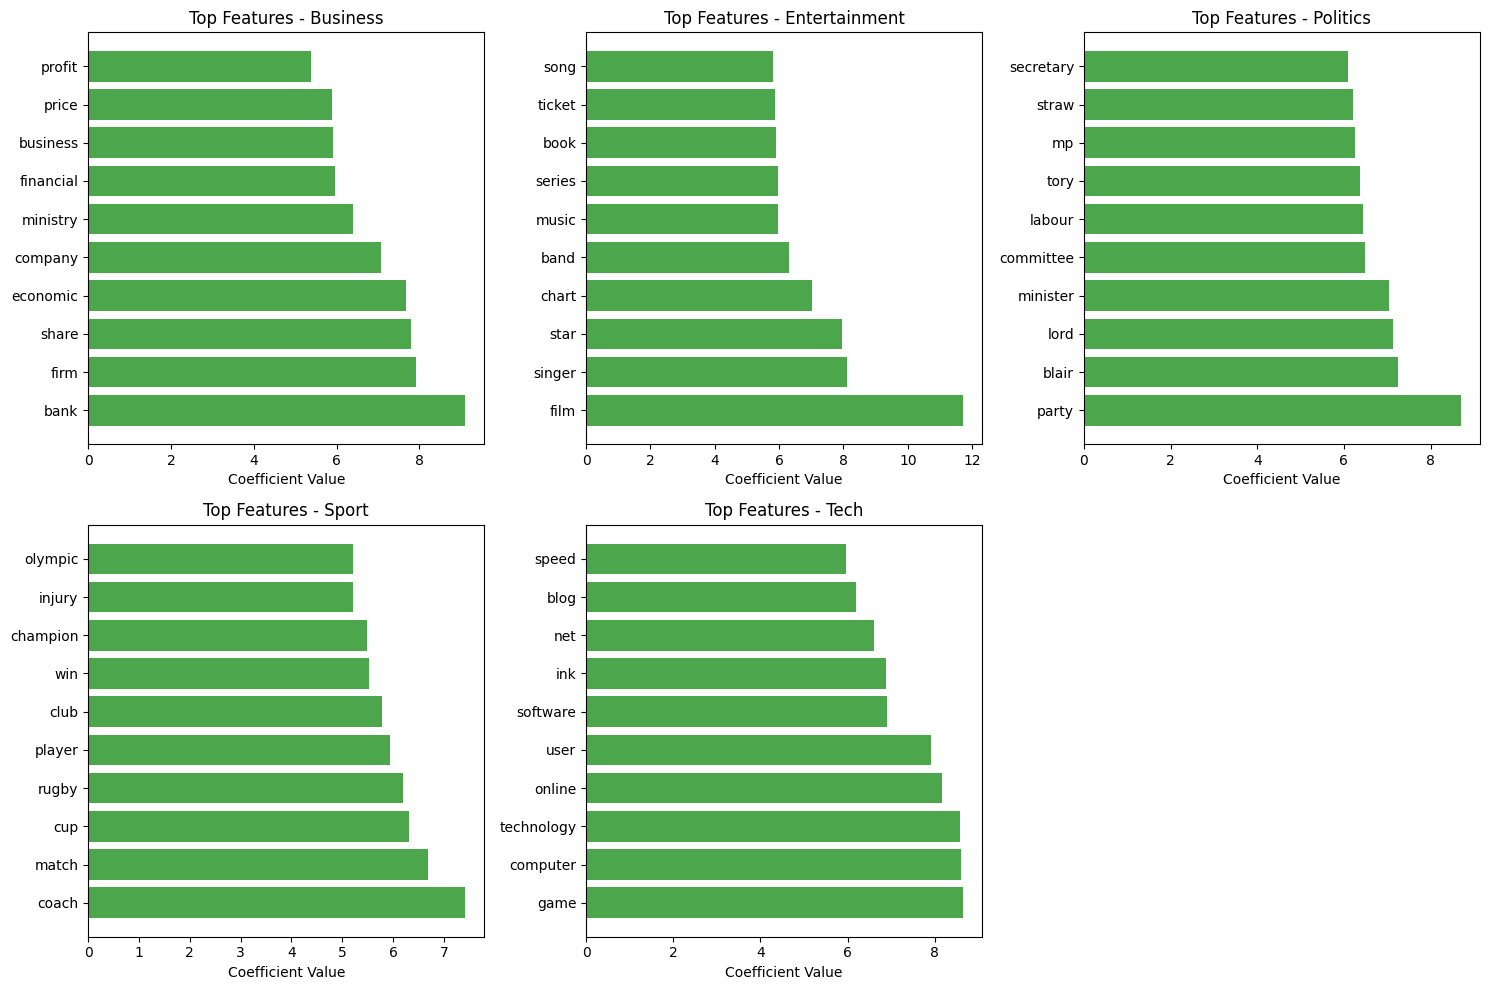


MODEL SAVING
Model saved as 'bbc_news_classifier.pkl'

Model loading test:
Input: 'Apple announced new iPhone with advanced features and technology'
Predicted category: tech

FINAL MODEL PERFORMANCE SUMMARY
Best Model: Logistic Regression (Tuned)
Final Accuracy: 0.9718 (97.18%)
Feature Set: Optimized TF-IDF (3000 features)
Training Time: 57.65 seconds
Model Saved: bbc_news_classifier.pkl

READY FOR DEPLOYMENT!


In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support
import joblib

print("=== HYPERPARAMETER TUNING & MODEL OPTIMIZATION ===")

# We'll use the optimized TF-IDF features
X_train = feature_sets['optimized']['X_train']
X_test = feature_sets['optimized']['X_test']
y_train = feature_sets['optimized']['y_train']
y_test = feature_sets['optimized']['y_test']

# Hyperparameter tuning for Logistic Regression
print("--- Grid Search for Logistic Regression ---")

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000]
}

# Use randomized search for faster tuning
random_search = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

print("Performing randomized search...")
start_time = time.time()
random_search.fit(X_train, y_train)
tuning_time = time.time() - start_time

print(f"Tuning completed in {tuning_time:.2f} seconds")
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

# Train final model with best parameters
best_lr = random_search.best_estimator_
y_pred_tuned = best_lr.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"\nTuned model accuracy: {tuned_accuracy:.4f}")
print(f"Improvement over baseline: {tuned_accuracy - 0.9742:.4f}")

# Compare baseline vs tuned model
plt.figure(figsize=(10, 6))

models_compare = ['Baseline LR', 'Tuned LR']
accuracies_compare = [0.9742, tuned_accuracy]

plt.subplot(1, 2, 1)
bars = plt.bar(models_compare, accuracies_compare, color=['#2E86AB', '#F18F01'])
plt.title('Baseline vs Tuned Logistic Regression')
plt.ylabel('Accuracy')
plt.ylim(0.96, 0.98)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.4f}', ha='center', va='bottom')

# Detailed performance by category for tuned model
plt.subplot(1, 2, 2)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_tuned, average=None)

x = np.arange(len(label_encoder.classes_))
width = 0.25

plt.bar(x - width, precision, width, label='Precision', alpha=0.8)
plt.bar(x, recall, width, label='Recall', alpha=0.8)
plt.bar(x + width, f1, width, label='F1-Score', alpha=0.8)

plt.xlabel('Categories')
plt.ylabel('Scores')
plt.title('Performance Metrics by Category (Tuned Model)')
plt.xticks(x, label_encoder.classes_, rotation=45)
plt.legend()
plt.ylim(0.9, 1.02)

plt.tight_layout()
plt.show()

# Error analysis - misclassified examples
print("\n" + "="*60)
print("ERROR ANALYSIS - MISCLASSIFIED EXAMPLES")
print("="*60)

misclassified_mask = (y_pred_tuned != y_test)
misclassified_indices = np.where(misclassified_mask)[0]

if len(misclassified_indices) > 0:
    print(f"Number of misclassified articles: {len(misclassified_indices)}")
    
    # Show first few misclassified examples
    for i, idx in enumerate(misclassified_indices[:5]):
        true_label = label_encoder.inverse_transform([y_test[idx]])[0]
        pred_label = label_encoder.inverse_transform([y_pred_tuned[idx]])[0]
        text_preview = df_clean.iloc[idx]['text'][:150] + "..."
        
        print(f"\nMisclassified Example {i+1}:")
        print(f"True: {true_label} -> Predicted: {pred_label}")
        print(f"Text preview: {text_preview}")

# Model interpretability - Feature importance
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get feature names
feature_names = feature_sets['optimized']['vectorizer'].get_feature_names_out()

# Analyze coefficients for each class
plt.figure(figsize=(15, 10))
for i, category in enumerate(label_encoder.classes_):
    plt.subplot(2, 3, i+1)
    
    # Get coefficients for this class
    coef = best_lr.coef_[i]
    
    # Get top 10 positive and negative features
    top_positive_indices = coef.argsort()[-10:][::-1]
    top_negative_indices = coef.argsort()[:10]
    
    # Plot positive features
    positive_features = [feature_names[idx] for idx in top_positive_indices]
    positive_scores = [coef[idx] for idx in top_positive_indices]
    
    plt.barh(positive_features, positive_scores, color='green', alpha=0.7)
    plt.title(f'Top Features - {category.title()}')
    plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.show()

# Save the best model and vectorizer
print("\n" + "="*60)
print("MODEL SAVING")
print("="*60)

# Create model package
model_package = {
    'model': best_lr,
    'vectorizer': feature_sets['optimized']['vectorizer'],
    'label_encoder': label_encoder,
    'feature_names': feature_names,
    'accuracy': tuned_accuracy
}

# Save model
joblib.dump(model_package, 'bbc_news_classifier.pkl')
print("Model saved as 'bbc_news_classifier.pkl'")

# Test loading the model
loaded_package = joblib.load('bbc_news_classifier.pkl')
loaded_model = loaded_package['model']
loaded_vectorizer = loaded_package['vectorizer']
loaded_label_encoder = loaded_package['label_encoder']

# Test prediction with loaded model
test_text = ["Apple announced new iPhone with advanced features and technology"]
test_processed = preprocess_text(test_text[0])
test_tfidf = loaded_vectorizer.transform([test_processed])
prediction = loaded_model.predict(test_tfidf)
predicted_category = loaded_label_encoder.inverse_transform(prediction)[0]

print(f"\nModel loading test:")
print(f"Input: '{test_text[0]}'")
print(f"Predicted category: {predicted_category}")

print("\n" + "="*60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"Best Model: Logistic Regression (Tuned)")
print(f"Final Accuracy: {tuned_accuracy:.4f} ({tuned_accuracy*100:.2f}%)")
print(f"Feature Set: Optimized TF-IDF (3000 features)")
print(f"Training Time: {tuning_time:.2f} seconds")
print(f"Model Saved: bbc_news_classifier.pkl")

print("\n" + "="*60)
print("READY FOR DEPLOYMENT!")
print("="*60)


In [31]:
!streamlit run bbc_news_app.py

/bin/bash: line 1: streamlit: command not found
